## Load Data

In [4]:
import os
import sys
# Boiler plate code to ensure scripts can import code from waves package.
# Adds project directory to python path.
proj_dir = os.path.dirname(os.path.abspath(os.curdir))
if sys.path[0] != proj_dir:
    sys.path.insert(0, proj_dir)
print(f"Project directory: {proj_dir}")  

Project directory: C:\Users\tul72\Box\aeml


In [58]:
from waves.load_data import load_json_file_from_path
data_01 = load_json_file_from_path(r'C:\Users\tul72\Box\aeml\experiment_data\robustness\filtered\20220711_01.json')
data_03 = load_json_file_from_path(r'C:\Users\tul72\Box\aeml\experiment_data\robustness\filtered\20220711_03.json')
data_05 = load_json_file_from_path(r'C:\Users\tul72\Box\aeml\experiment_data\robustness\filtered\20220713_05.json')
data_08 = load_json_file_from_path(r'C:\Users\tul72\Box\aeml\experiment_data\robustness\filtered\20220713_08.json')

## Separate out waveforms and metadata according to plate length

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def load_scenario(waves,event,location,angle,length,sensor,leng,num_sen,loc):
    
    if num_sen == 4:
        w = [waves[(length == leng) & (sensor == 1) & (location == loc)],
             waves[(length == leng) & (sensor == 2) & (location == loc)],
             waves[(length == leng) & (sensor == 3) & (location == loc)],
             waves[(length == leng) & (sensor == 4) & (location == loc)]]
    elif num_sen == 2:
        w = [waves[(length == leng) & (sensor == 1) & (location == loc)],
             waves[(length == leng) & (sensor == 2) & (location == loc)]]
    elif num_sen == 1:
        w = waves[(length == leng) & (sensor == 1) & (location == loc)]
              
    ev = event[(length==leng) & (sensor==1) & (location==loc)]
    
    print(f"# of {leng}, {loc}, {num_sen} channel waves : {len(ev)}")

    return w,ev

def compute_mean_wave(w):
    
    # Check if multiple channel
    if type(w) == list: 
        mean_w = []
        for idx, channel in enumerate(w):
            mean_w.append(np.mean(channel,axis=0))
    else: # single channel
        mean_w = np.mean(w,axis=0)
        
    return mean_w

# 01 - 6 inch front
w6in_front, ev6in_front = load_scenario(data_01['waves'],data_01['event'],data_01['location'],data_01['angle'],data_01['length'],
                                        data_01['sensor'],leng='6in',num_sen=4,loc='front')
mean_w6in_front = compute_mean_wave(w6in_front)

# 03 - 8 inch front
w8in_front, ev8in_front = load_scenario(data_03['waves'],data_03['event'],data_03['location'],data_03['angle'],data_03['length'],
                                        data_03['sensor'],leng='8in',num_sen=4,loc='front')
mean_w8in_front = compute_mean_wave(w8in_front)

# 05 - 10 inch front
w10in_front, ev10in_front = load_scenario(data_05['waves'],data_05['event'],data_05['location'],data_05['angle'],data_05['length'],
                                        data_05['sensor'],leng='10in',num_sen=4,loc='front')
mean_w10in_front = compute_mean_wave(w10in_front)

# 088 - 15 inch front
w15in_front, ev15in_front = load_scenario(data_08['waves'],data_08['event'],data_08['location'],data_08['angle'],data_08['length'],
                                        data_08['sensor'],leng='15in',num_sen=4,loc='front')
mean_w15in_front = compute_mean_wave(w15in_front)

# of 6in, front, 4 channel waves : 50
# of 8in, front, 4 channel waves : 47
# of 10in, front, 4 channel waves : 48
# of 15in, front, 4 channel waves : 42


## Plot the waves from each plate length, and ensure no signals need to be filtered
Signals should have already been filtered at this stage. This is just to double check.

In [60]:
# Signal Processing Parameters
sig_len = 4096
dt = 10**-7
duration = sig_len*dt*10**6 # convert to us
time = np.linspace(0,duration,sig_len) # discretization of signal time

## Compute and Plot the Mean Waveforms for each Plate Length

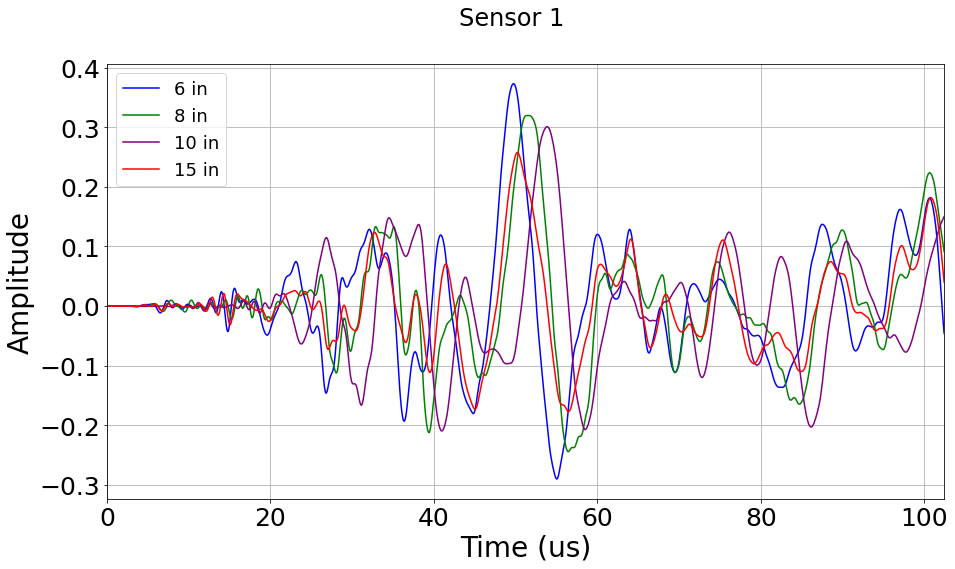

In [61]:
from waves.visuals import create_figure
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 1',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in_front[0],'-',label = '6 in', color='blue')
ax.plot(time,mean_w8in_front[0],'-',label = '8 in', color='green')
ax.plot(time,mean_w10in_front[0],'-',label = '10 in', color='purple')
ax.plot(time,mean_w15in_front[0],'-',label = '15 in', color='red')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

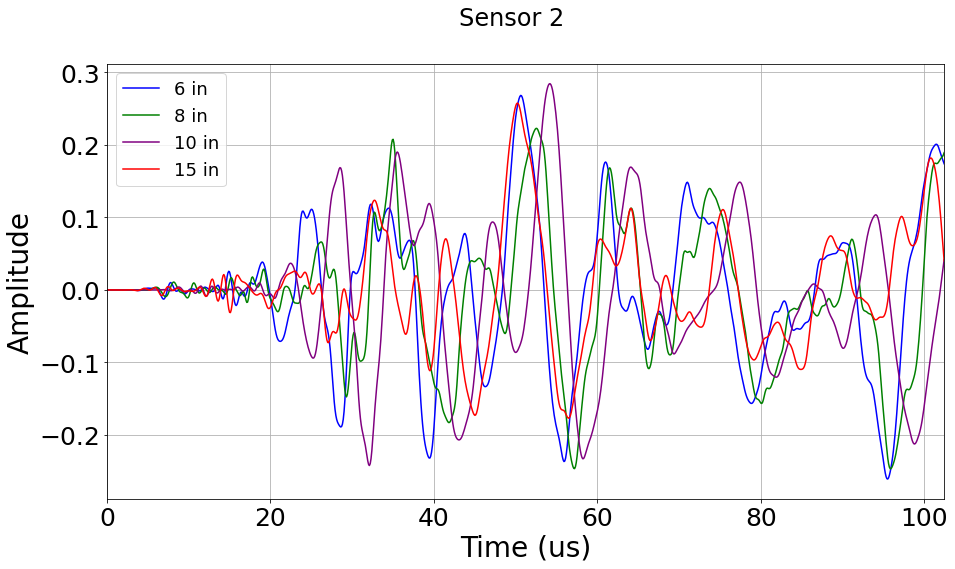

In [62]:
from waves.visuals import create_figure
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 2',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in_front[1],'-',label = '6 in', color='blue')
ax.plot(time,mean_w8in_front[1],'-',label = '8 in', color='green')
ax.plot(time,mean_w10in_front[1],'-',label = '10 in', color='purple')
ax.plot(time,mean_w15in_front[0],'-',label = '15 in', color='red')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

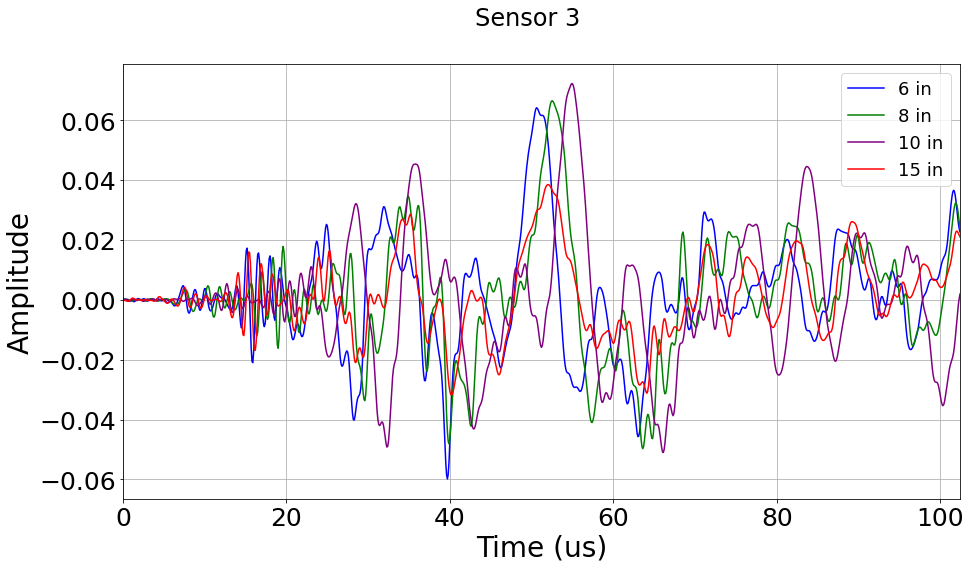

In [64]:
from waves.visuals import create_figure
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 3',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in_front[2],'-',label = '6 in', color='blue')
ax.plot(time,mean_w8in_front[2],'-',label = '8 in', color='green')
ax.plot(time,mean_w10in_front[2],'-',label = '10 in', color='purple')
ax.plot(time,mean_w15in_front[2],'-',label = '15 in', color='red')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

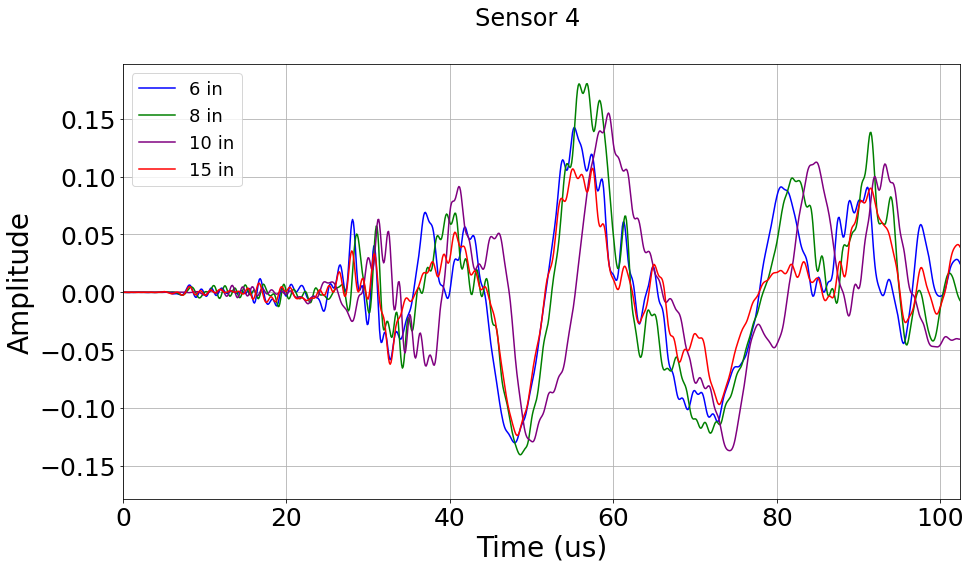

In [65]:
from waves.visuals import create_figure
# Plot the averaged waveforms
fig,spec2 = create_figure('Sensor 4',columns=1,rows=1,width=15,height=8,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)

ax = fig.add_subplot(spec2[0,0])
ax.plot(time,mean_w6in_front[3],'-',label = '6 in', color='blue')
ax.plot(time,mean_w8in_front[3],'-',label = '8 in', color='green')
ax.plot(time,mean_w10in_front[3],'-',label = '10 in', color='purple')
ax.plot(time,mean_w15in_front[3],'-',label = '15 in', color='red')

plt.legend()
ax.set_xlim([0,duration/4])
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
#ax.set_ylim([-0.9,0.65])

plt.grid()
plt.show()

## Compute and Plot Mean FFT (Entire Waveform)
The FFTs here are computed on the entire raw waveform (this is necessary to average them all and visualize, otherwise the ffts would have different lengths). Later in the code, the waveforms are chopped down to only what's contained between the start and end (what's visualized in the previous plotting of raw waveforms) before computed frequency domain features. 

In [30]:
# Compute FFTs
low_pass = 0             # [Hz] ; low frequency cutoff
high_pass = 1000*10**3    # [Hz] ; high frequency cutoff\
dt = 10**-7              # [seconds] ; sample period / time between samples
fft_units = 1000

from waves.signal_processing import fft

In [49]:
# 6 in
fft6in_front = []
for sensor in w6in_front: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave[0:1024], low_pass, high_pass)
        fftsensor.append(z)
    fft6in_front.append(np.array(fftsensor))
mean_fft6in_front = [np.mean(fft6in_front[0], axis=0), np.mean(fft6in_front[1], axis=0),  
             np.mean(fft6in_front[2], axis=0), np.mean(fft6in_front[3], axis=0)]  

In [50]:
# 8 in
fft8in_front = []
for sensor in w8in_front: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave[0:1024], low_pass, high_pass)
        fftsensor.append(z)
    fft8in_front.append(np.array(fftsensor))
mean_fft8in_front = [np.mean(fft8in_front[0], axis=0), np.mean(fft8in_front[1], axis=0),  
             np.mean(fft8in_front[2], axis=0), np.mean(fft8in_front[3], axis=0)]  

In [51]:
# 10 in
fft10in_front = []
for sensor in w10in_front: 
    fftsensor = []
    for idx,wave in enumerate(sensor):
        w,z = fft(dt, wave[0:1024], low_pass, high_pass)
        fftsensor.append(z)
    fft10in_front.append(np.array(fftsensor))
mean_fft10in_front = [np.mean(fft10in_front[0], axis=0), np.mean(fft10in_front[1], axis=0),  
             np.mean(fft10in_front[2], axis=0), np.mean(fft10in_front[3], axis=0)]  

w = w/1000

### Sensor 1

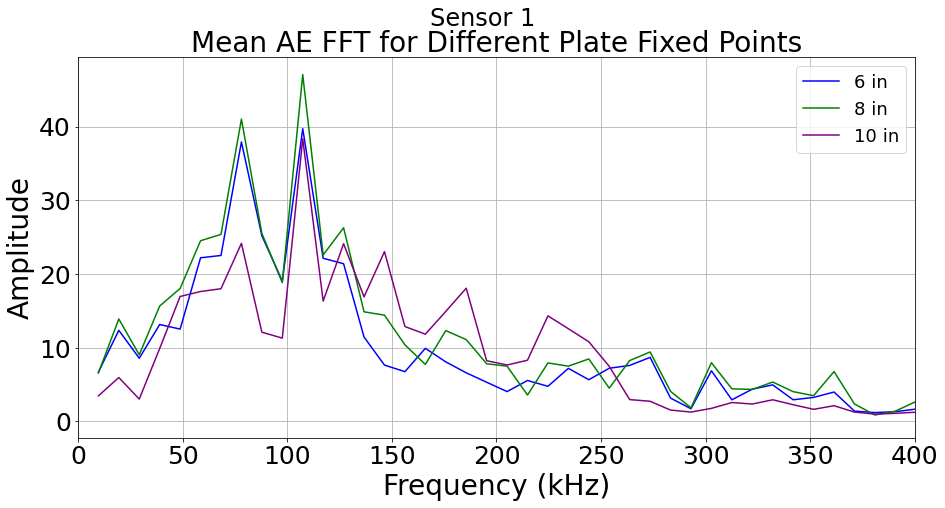

In [53]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 1',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in_front[0],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft8in_front[0],'-',label = '8 in', color='green')
ax.plot(w,mean_fft10in_front[0],'-',label = '10 in', color='purple')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,400])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 2

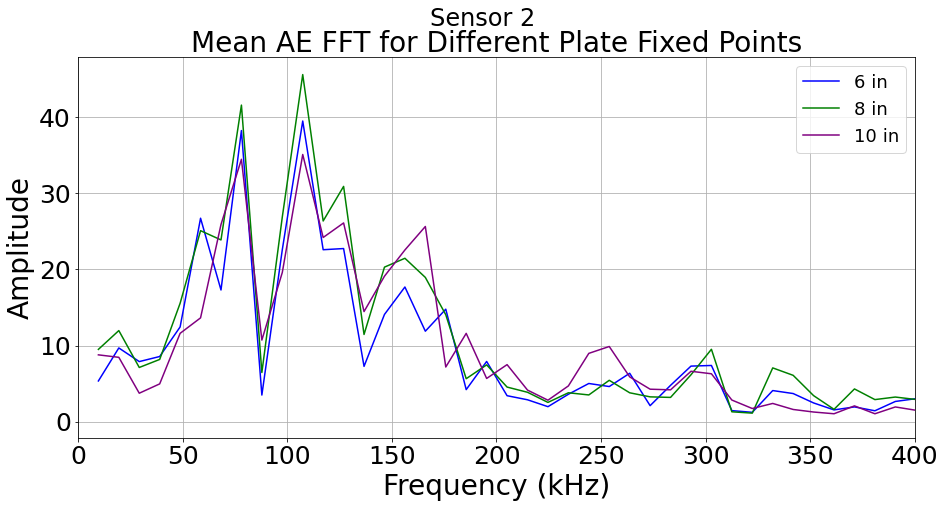

In [55]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 2',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in_front[1],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft8in_front[1],'-',label = '8 in', color='green')
ax.plot(w,mean_fft10in_front[1],'-',label = '10 in', color='purple')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,400])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 3

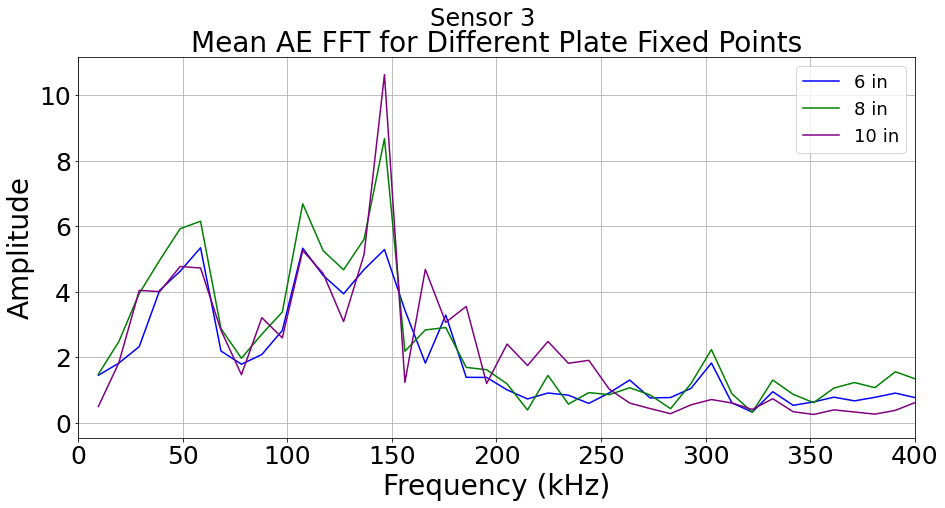

In [56]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 3',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in_front[2],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft8in_front[2],'-',label = '8 in', color='green')
ax.plot(w,mean_fft10in_front[2],'-',label = '10 in', color='purple')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,400])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

### Sensor 4

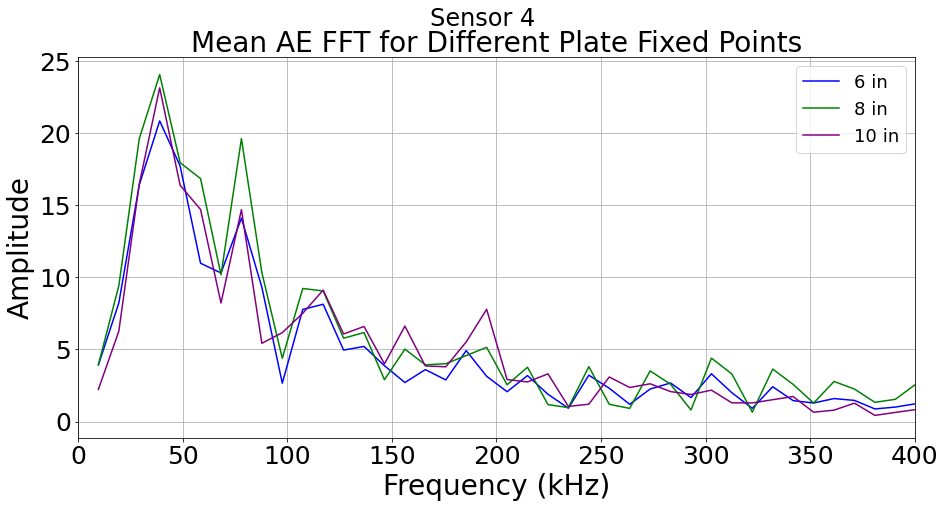

In [57]:
# Plot the averaged ffts
fig,spec2 = create_figure('Sensor 4',columns=1,rows=1,width=15,height=7,default_font_size=18\
                         ,tick_font_size=25,legend_font_size=18,axes_font_size=28,
                         title_font_size=28)
ax = fig.add_subplot(spec2[0,0])
ax.plot(w,mean_fft6in_front[3],'-',label = '6 in', color='blue')
ax.plot(w,mean_fft8in_front[3],'-',label = '8 in', color='green')
ax.plot(w,mean_fft10in_front[3],'-',label = '10 in', color='purple')

ax.set_title('Mean AE FFT for Different Plate Fixed Points')

ax.set_xlim([low_pass/fft_units,high_pass/fft_units])
ax.set_xlim([0,400])
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Amplitude')
plt.legend()

plt.grid()
plt.show()

## Get Freq Centroid

In [67]:
# Compute FFTs
low_pass = 0             # [Hz] ; low frequency cutoff
high_pass = 1000*10**3    # [Hz] ; high frequency cutoff\
dt = 10**-7              # [seconds] ; sample period / time between samples
fft_units = 1000

from waves.signal_processing import get_freq_centroid

In [74]:
def get_mean_std_freq_centroid(waves,dt,low_pass,high_pass):
    
    freq_cent = []
    
    for sensor in waves: 
        freq_cent_sensor = []    
        for idx,wave in enumerate(sensor):
            freq_cent_sensor.append(get_freq_centroid(wave,dt,low_pass,high_pass))
        freq_cent.append(freq_cent_sensor)
        
    mean_freq_cent = [np.mean(freq_cent[0], axis=0), np.mean(freq_cent[1], axis=0),  
                 np.mean(freq_cent[2], axis=0), np.mean(freq_cent[3], axis=0)]  
    std_freq_cent = [np.std(freq_cent[0], axis=0), np.std(freq_cent[1], axis=0),  
                 np.std(freq_cent[2], axis=0), np.std(freq_cent[3], axis=0)]  
    
    return mean_freq_cent, std_freq_cent
    
w6in_front_mean_freq_cent, w6in_front_std_freq_cent = get_mean_std_freq_centroid(w6in_front,dt,low_pass,high_pass)

In [76]:
w6in_front_std_freq_cent

[9923.209390457947, 9061.198070258368, 19192.758366282837, 17708.251859311575]

In [ ]:
w6in